# ***House Prices: Advanced Regression Techniques***

## **Estimating house prices**

# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
training_data = pd.read_csv("train.csv")

In [3]:
training_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
training_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,NaN,NaN,NaN,6.32192,2.70363,1,5,6,8,12
YrSold,1460,NaN,NaN,NaN,2007.82,1.3281,2006,2007,2008,2009,2010
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
testing_data = pd.read_csv("test.csv")

In [7]:
testing_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [8]:
testing_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1459,NaN,NaN,NaN,2190,421.321,1461,1825.5,2190,2554.5,2919
MSSubClass,1459,NaN,NaN,NaN,57.3783,42.7469,20,20,50,70,190
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232,NaN,NaN,NaN,68.5804,22.3768,21,58,67,80,200
LotArea,1459,NaN,NaN,NaN,9819.16,4955.52,1470,7391,9399,11517.5,56600
...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,1459,NaN,NaN,NaN,58.1679,630.807,0,0,0,0,17000
MoSold,1459,NaN,NaN,NaN,6.10418,2.72243,1,4,6,8,12
YrSold,1459,NaN,NaN,NaN,2007.77,1.30174,2006,2007,2008,2009,2010
SaleType,1458,9,WD,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# **Train Test  data shape**

In [10]:
print("Training data shape: ",training_data.shape)
print("Testing data shape: ",testing_data.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


# **Saving the Id column**

In [11]:
# train_id = training_data["Id"]
test_id = testing_data["Id"]

In [12]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

# **Dropping ID column** 

In [13]:
# now droping "ID" column since it's unneccessary for the prediction process
training_data.drop("Id", axis = 1, inplace = True)
testing_data.drop("Id", axis = 1, inplace = True)

In [14]:
#check again the data size after dropping the "Id" variable
print("Training data shape: ",training_data.shape)
print("Testing data shape: ",testing_data.shape)

Training data shape:  (1460, 80)
Testing data shape:  (1459, 79)


# **Data Preprocessing**

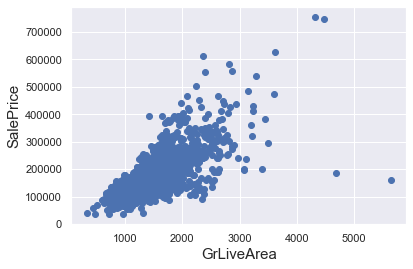

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = training_data["GrLivArea"], y = training_data["SalePrice"])
plt.xlabel("GrLiveArea", fontsize = 15)
plt.ylabel("SalePrice", fontsize = 15)
plt.show()

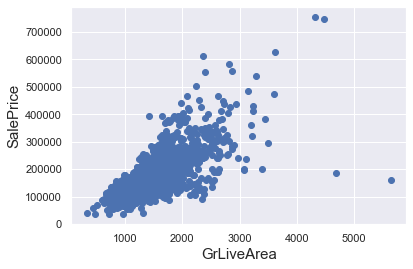

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = training_data["GrLivArea"], y = training_data["SalePrice"])
plt.xlabel("GrLiveArea", fontsize = 15)
plt.ylabel("SalePrice", fontsize = 15)
plt.show()

# **Target Variable**


 mu = 180921.20 and sigma = 79415.29



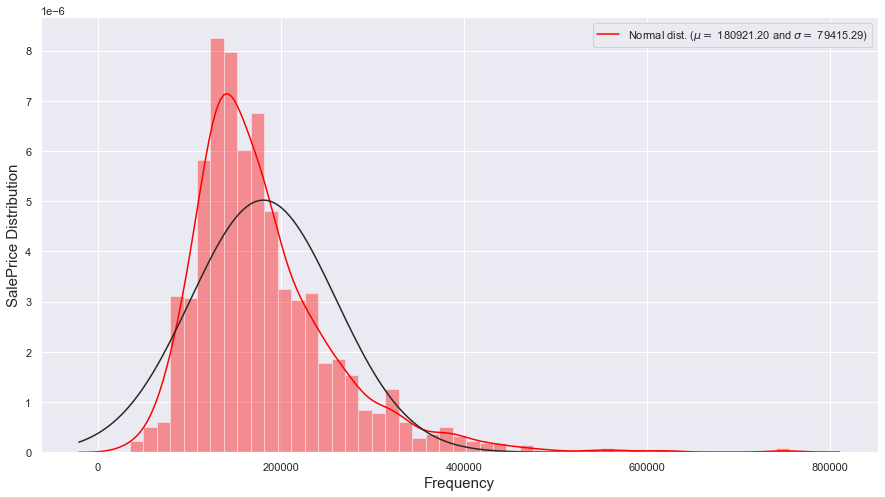

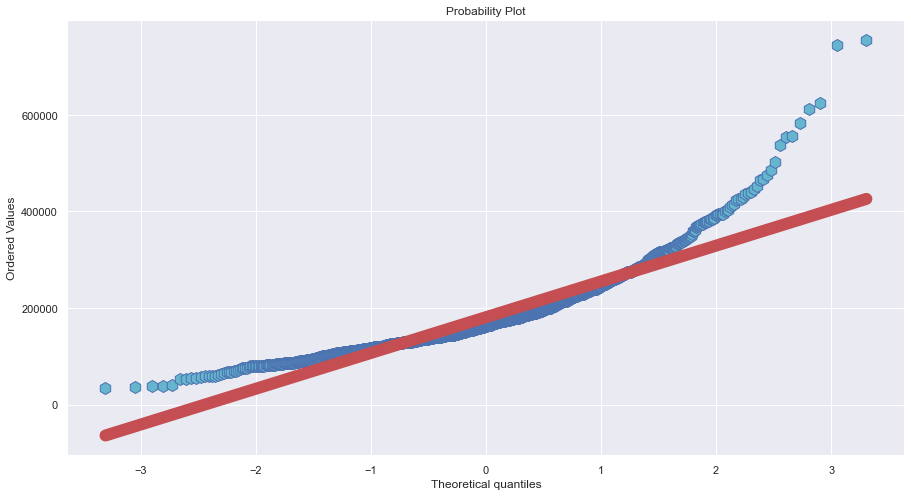

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.distplot(training_data["SalePrice"], fit = norm, color = "red")

# Now Fitted the paramters used by the function
(mu, sigma) = norm.fit(training_data["SalePrice"])
print('\n mu = {:.2f} and sigma = {:.2f}\n'. format(mu,sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma = $ {:.2f})'.format(mu,sigma)], loc = 'best')
plt.xlabel("Frequency", fontsize = 15)
plt.ylabel("SalePrice Distribution", fontsize = 15)

fig = plt.figure()
ax = fig.add_subplot(111)
result = stats.probplot(training_data["SalePrice"], plot = plt)
ax.get_lines()[0].set_marker('h')
ax.get_lines()[0].set_markerfacecolor('c')
ax.get_lines()[0].set_markersize(12.0)
ax.get_lines()[1].set_linewidth(12.0)
plt.show()


# **Log-transformation of the target variable**

In [18]:
training_data["SalePrice"] = np.log1p(training_data["SalePrice"])


 mu = 12.02 and sigma = 0.40



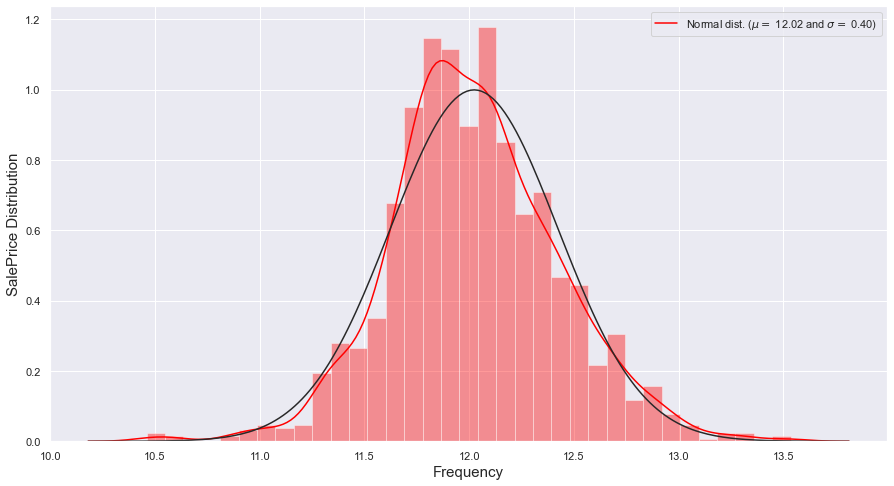

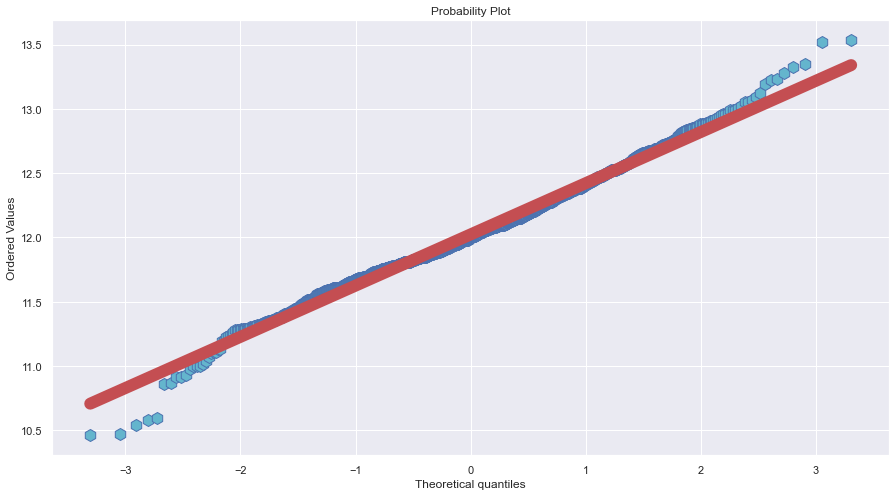

In [19]:
# Now checking the new distribution
sns.distplot(training_data["SalePrice"], fit = norm, color = "red");

# Now Fitted the paramters used by the function
(mu, sigma) = norm.fit(training_data["SalePrice"])
print('\n mu = {:.2f} and sigma = {:.2f}\n'. format(mu,sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma = $ {:.2f})'.format(mu,sigma)], loc = 'best')
plt.xlabel("Frequency", fontsize = 15)
plt.ylabel("SalePrice Distribution", fontsize = 15)

fig = plt.figure()
ax = fig.add_subplot(111)
result = stats.probplot(training_data["SalePrice"], plot = plt)
ax.get_lines()[0].set_marker('h')
ax.get_lines()[0].set_markerfacecolor('c')
ax.get_lines()[0].set_markersize(12.0)
ax.get_lines()[1].set_linewidth(12.0)
plt.show()

# **Featre Enginnering**

In [20]:
n_train = training_data.shape[0]
n_test = testing_data.shape[0]
y_train = training_data.SalePrice.iloc[1:]
all_data = pd.concat((training_data,testing_data)).reset_index(drop = True)
all_data.drop(['SalePrice'],axis = 1, inplace =  True)
print('All Data size: {}'.format(all_data.shape))

All Data size: (2919, 79)


In [21]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" : all_data_na})
missing_data.head(30)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


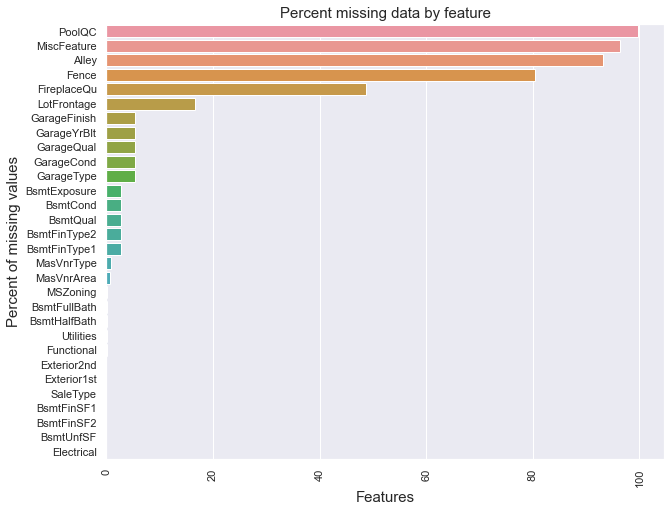

In [22]:
f, ax = plt.subplots(figsize = (10,8))
plt.xticks(rotation = '90')
sns.barplot(y = all_data_na.index, x = all_data_na)
plt.xlabel("Features", fontsize = 15)
plt.ylabel("Percent of missing values", fontsize = 15)
plt.title("Percent missing data by feature",fontsize = 15)
plt.show()

# **Data Correlation** 

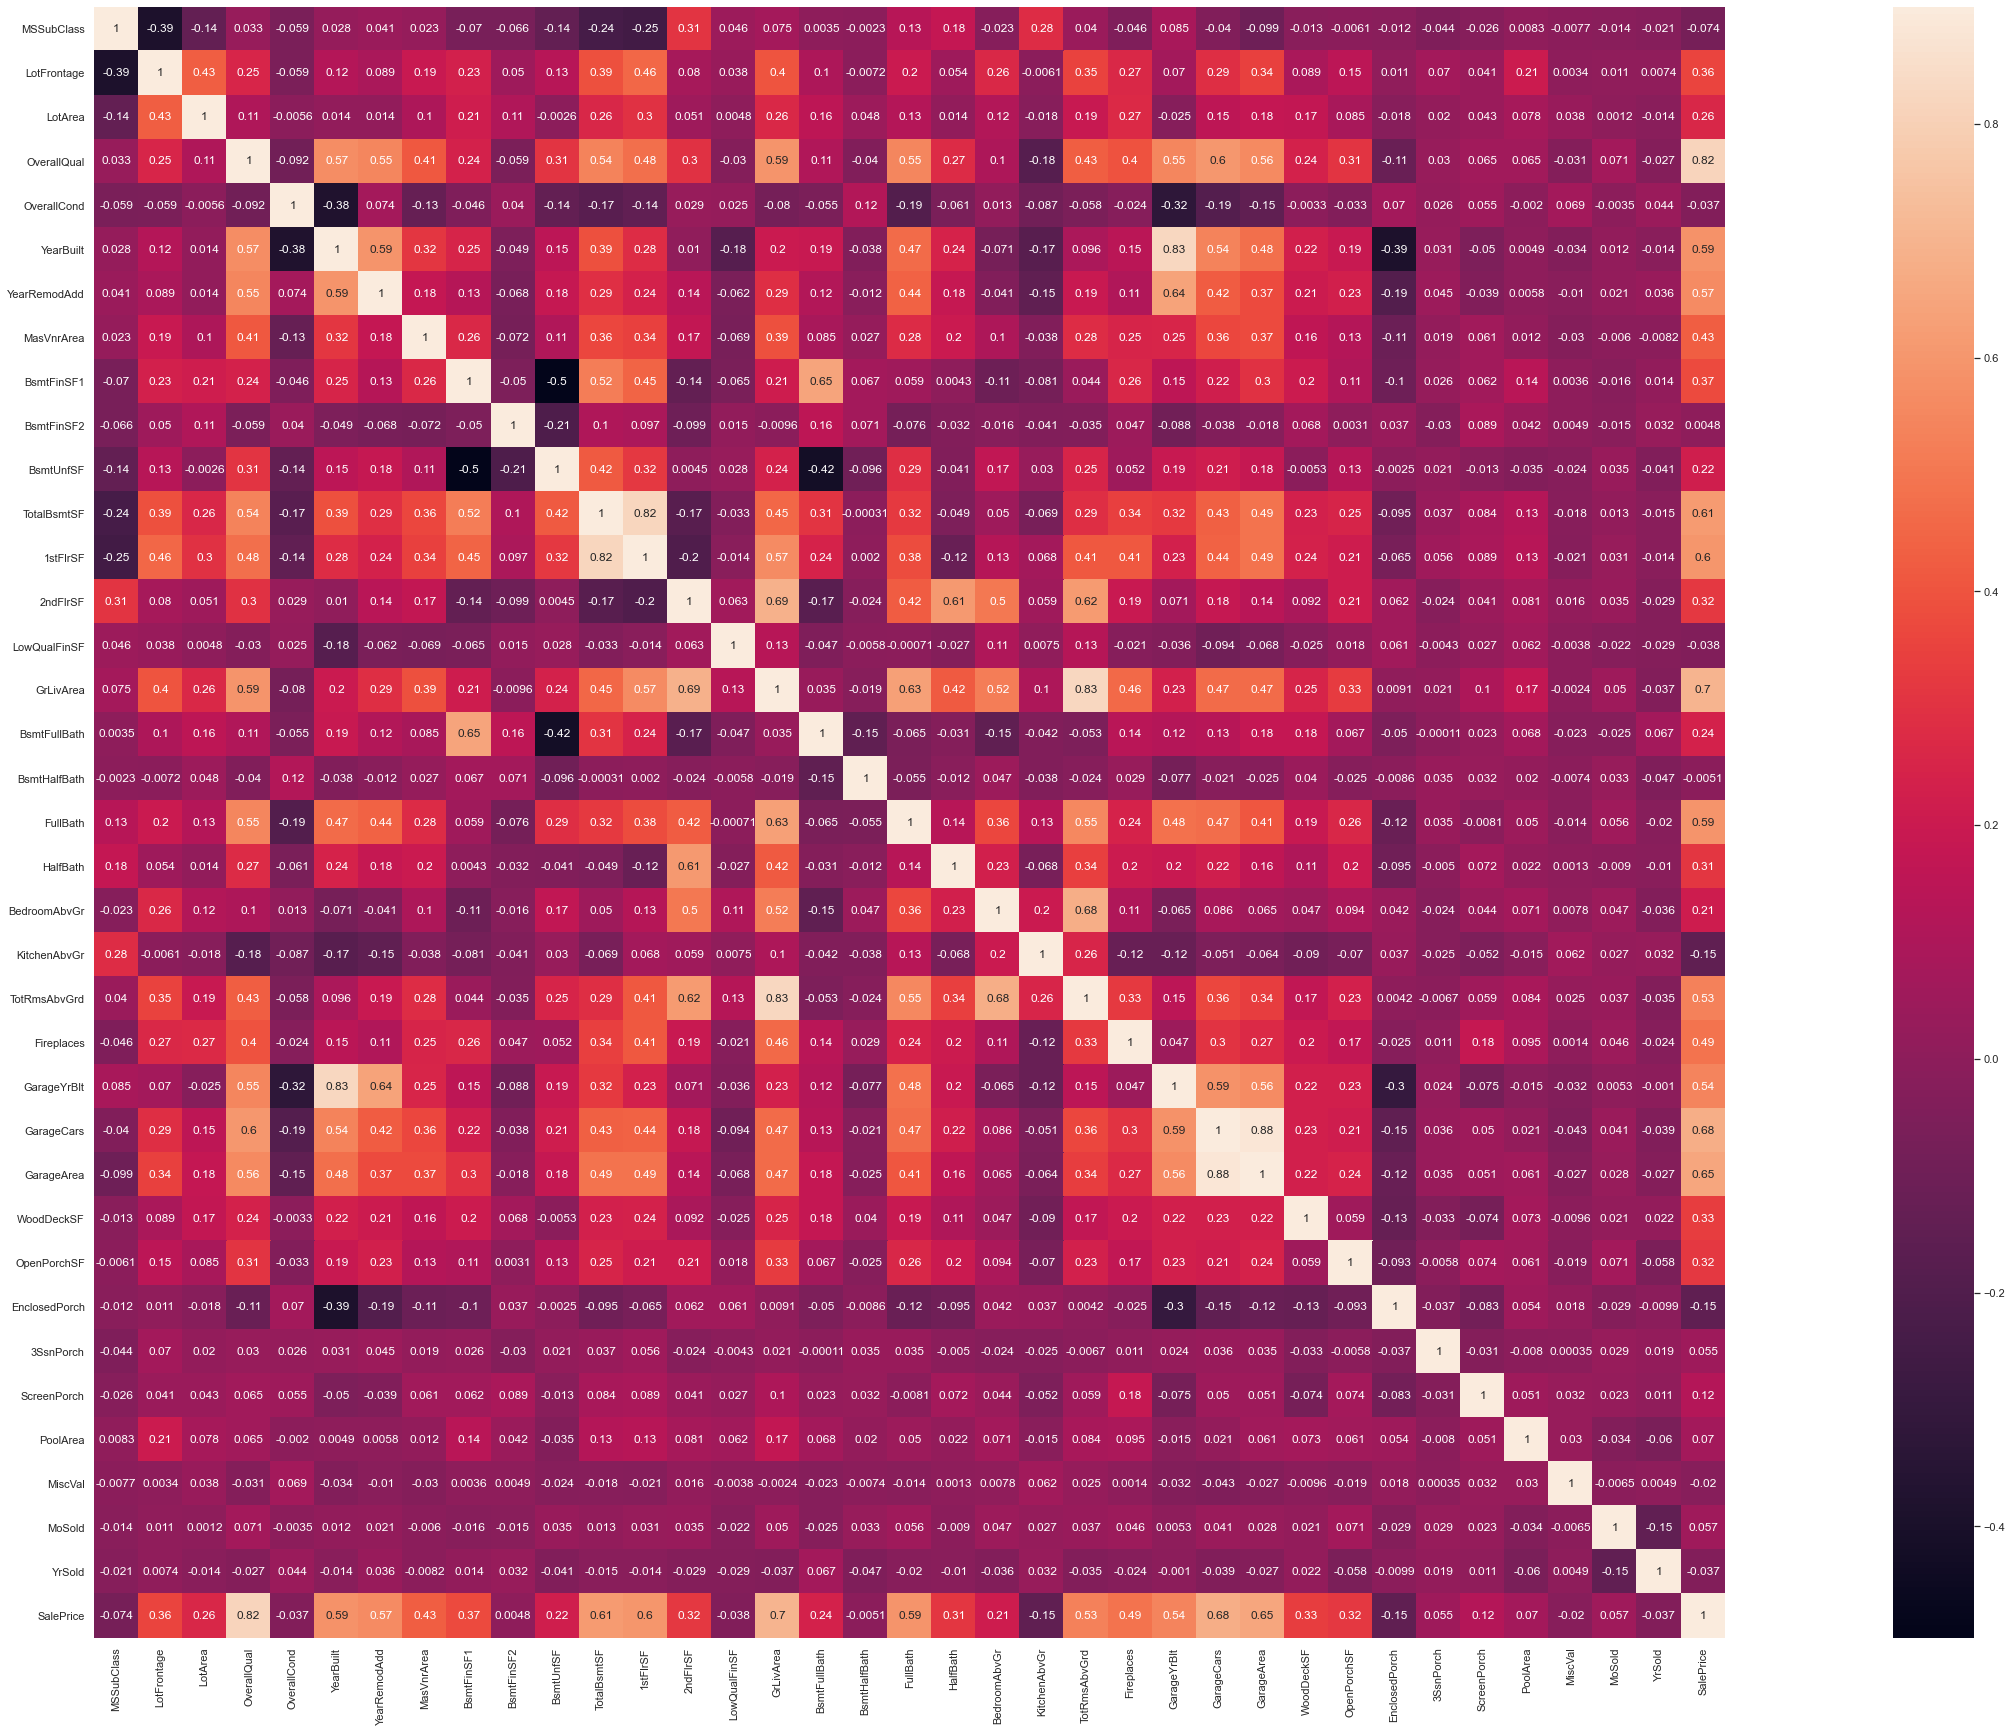

In [23]:
#correlation map to see how features are correlated with sale price
cor = training_data.corr()
plt.subplots(figsize = (60,30))
sns.heatmap(cor, vmax = 0.9, square = True, annot = True)
plt.show()

# **Imputing the missing values**

In [24]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [25]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [26]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [27]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [28]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [29]:
# Now groupby neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [30]:
col = ("GarageType" , "GarageFinish" , "GarageQual" ,"GarageCond")
for c in col:
    all_data[c] = all_data[c].fillna("None")

In [31]:
col2 = ("GarageYrBlt" , "GarageArea" , "GarageCars")
for c2 in col2:
    all_data[c2] = all_data[c2].fillna(0)

In [32]:
col3 = ("BsmtFinSF1" , "BsmtFinSF2" , "BsmtUnfSF", "TotalBsmtSF" ,
"BsmtFullBath" , "BsmtHalfBath")
for c3 in col3:
    all_data[c3] = all_data[c3].fillna(0) 

In [33]:
col4 = ("BsmtQual" , "BsmtCond", "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2")
for c4 in col4:
    all_data[c4] = all_data[c4].fillna("None")

In [34]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [35]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

In [36]:
all_data = all_data.drop(['Utilities'], axis = 1)

In [37]:
all_data["Functional"] = all_data['Functional'].fillna('Typ')

In [38]:
all_data["Electrical"] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [39]:
all_data["KitchenQual"] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [40]:
all_data["Exterior1st"] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data["Exterior2nd"] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [41]:
all_data["SaleType"] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [42]:
all_data["MSSubClass"] = all_data['MSSubClass'].fillna("None")

 **Checking the remaining missing value ratio**

In [43]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({"Missing Ratio" : all_data_na})
missing_data.head(30)

,Missing Ratio


**More features engineering Transforming some numerical variables that are really categorical**

In [44]:
#MSSubClass = The Building class
all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)

In [45]:
#changing Overallcond into a categorical variable
all_data["OverallCond"] = all_data["OverallCond"].astype(str)

In [46]:
#Year and Month sold are transformed into categorical features
all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["MoSold"] = all_data["MoSold"].astype(str)

In [47]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

**Label encoding some categorical variables that may contain information in their ordering set**

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
# columns = ('FireplaceQu','BsmtQual','BsmtCond','GarageQual','ExterQual','ExterCond','HeatingQC',
#           'PoolQC','KitchenQual','BsmtFinType1','BsmtFinType2','Functional','Fence','BsmtExposure',
#           'GarageFinish','LandSlope','LotShape','PavedDrive','Street','Alley','CentralAir','MSSubClass',
#           'OverallCond','YrSold','MoSold')
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [50]:
#process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

In [51]:
#Shape
print("Shape all_data: {}" .format(all_data.shape))

Shape all_data: (2919, 78)


In [52]:
# all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].replace("None", 856)

**Adding one more important feature**

In [53]:
# Adding total sqfootage feature
# all_data["TotalSF"] = all_data["TotalBsmtSF"].abs() + all_data["1stFlrSF"] + all_data["2ndFlrSF"]
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# **Skewed Features**

In [54]:
# numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [55]:
#checking the skew of all the numeric features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


# **Box Cox Transformation of (highly) skewed features**

In [56]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


# **Dummy Variables**

In [57]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [58]:
train = all_data[1:n_train]
test = all_data[n_train:]

In [59]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error


In [63]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(train, y_train)  

RandomForestRegressor(random_state=0)

In [64]:
Y_pred = regressor.predict(test)
Y_pred

array([11.738326  , 11.94489095, 12.05817859, ..., 11.97748321,
       11.63203491, 12.31250401])

In [65]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train, y_train)

DecisionTreeRegressor(random_state=0)

In [66]:
y_pred = regressor.predict(test)
  
# print the predicted price
print("Predicted price: ", y_pred) 

Predicted price:  [11.87757552 11.96972353 12.04942468 ... 12.13726369 11.58989577
 12.34583894]


In [67]:
ft = pd.DataFrame({"Actual" : y_train,"predict" : y_pred})
ft

,Actual,predict
1,12.109016,11.877576
2,12.317171,11.969724
3,11.849405,12.049425
4,12.429220,12.208575
5,11.870607,12.219315
...,...,...
1455,12.072547,11.482477
1456,12.254868,11.385103
1457,12.493133,12.137264
1458,11.864469,11.589896


In [68]:
from xgboost import XGBRegressor

In [69]:
xgb_clf = XGBRegressor(n_estimators=1000, learning_rate=0.05)

xgb_clf.fit(train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
from sklearn.model_selection import cross_val_score
xgb_clf_cv = cross_val_score(xgb_clf,train, y_train, cv=10) # .911240390855695
print(xgb_clf_cv.mean())

0.9003049430160607


In [71]:
xgb_clf = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_clf.fit(train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
xgb_predictions_test = xgb_clf.predict(test) # shape(1459, 221)
# xgb_predictions_test

In [73]:
ft1 = pd.DataFrame({"Actual" : y_train,"predict" : xgb_predictions_test})

In [74]:
ft1

,Actual,predict
1,12.109016,11.725191
2,12.317171,12.008769
3,11.849405,12.170674
4,12.429220,12.195335
5,11.870607,12.181626
...,...,...
1455,12.072547,11.213378
1456,12.254868,11.252900
1457,12.493133,12.038230
1458,11.864469,11.653358


In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [77]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.07441762646005996


In [78]:
ft2 = pd.DataFrame({"Actual" : y_train,"predict" : lgb_pred})

In [79]:
ft2

,Actual,predict
1,12.109016,125232.504922
2,12.317171,155432.570415
3,11.849405,186767.271027
4,12.429220,195928.220636
5,11.870607,195915.138689
...,...,...
1455,12.072547,84446.805677
1456,12.254868,85135.145010
1457,12.493133,168877.528213
1458,11.864469,116732.409857


# **Submission**

In [80]:
submission = pd.DataFrame({"Id" : test_id, "SalePrice" : xgb_predictions_test})

In [81]:
submission.to_csv("sub1.csv",index = False)

[8.3688542e-04 5.4880709e-04 3.1389163e-03 4.3221586e-03 1.7492449e-03
 8.6024991e-04 1.5854241e-03 6.1819471e-02 7.3691900e-03 1.6294114e-02
 1.6095271e-02 6.6036783e-04 6.8848446e-04 9.5725927e-04 1.7426427e-02
 2.3452372e-03 2.3553576e-03 2.0790028e-03 5.0487597e-03 1.1193075e-03
 7.4252242e-04 1.6401173e-03 7.2314701e-04 7.2713755e-04 2.2615027e-02
 1.8940645e-03 2.0185469e-03 2.9160699e-04 5.8847102e-03 1.4195611e-03
 1.1566003e-03 5.8461940e-03 4.3607666e-03 1.9278772e-03 5.1706094e-02
 1.8283049e-02 9.6798880e-04 6.9427076e-03 5.5904485e-02 6.7515211e-04
 6.8407441e-03 1.2169742e-03 1.1144672e-01 2.3377233e-03 1.2353138e-03
 8.4201982e-03 4.0467279e-03 1.3455433e-03 1.2473485e-03 2.0965168e-03
 4.4232153e-04 3.6352486e-03 4.6685967e-03 0.0000000e+00 5.2914198e-04
 6.9564389e-04 8.1422966e-04 8.0345309e-04 6.9236793e-02 8.6150682e-03
 3.4251427e-03 1.2360109e-03 5.2753910e-02 5.6547619e-02 4.7597489e-03
 2.0717366e-03 4.2396423e-04 7.5718650e-04 8.8936480e-04 2.4070661e-03
 2.307

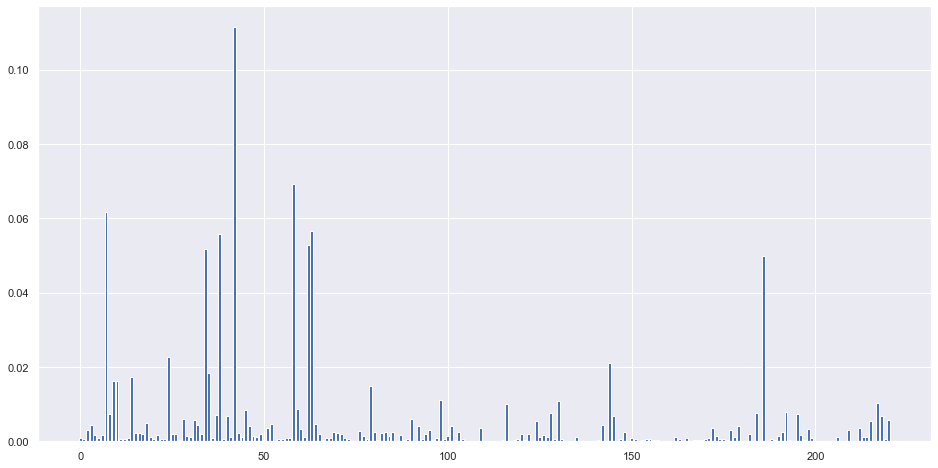

In [82]:
# feature importance
print(xgb_clf.feature_importances_)
from matplotlib import pyplot
# plot
f, ax = plt.subplots(figsize=(16, 8))
pyplot.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_)
pyplot.show()

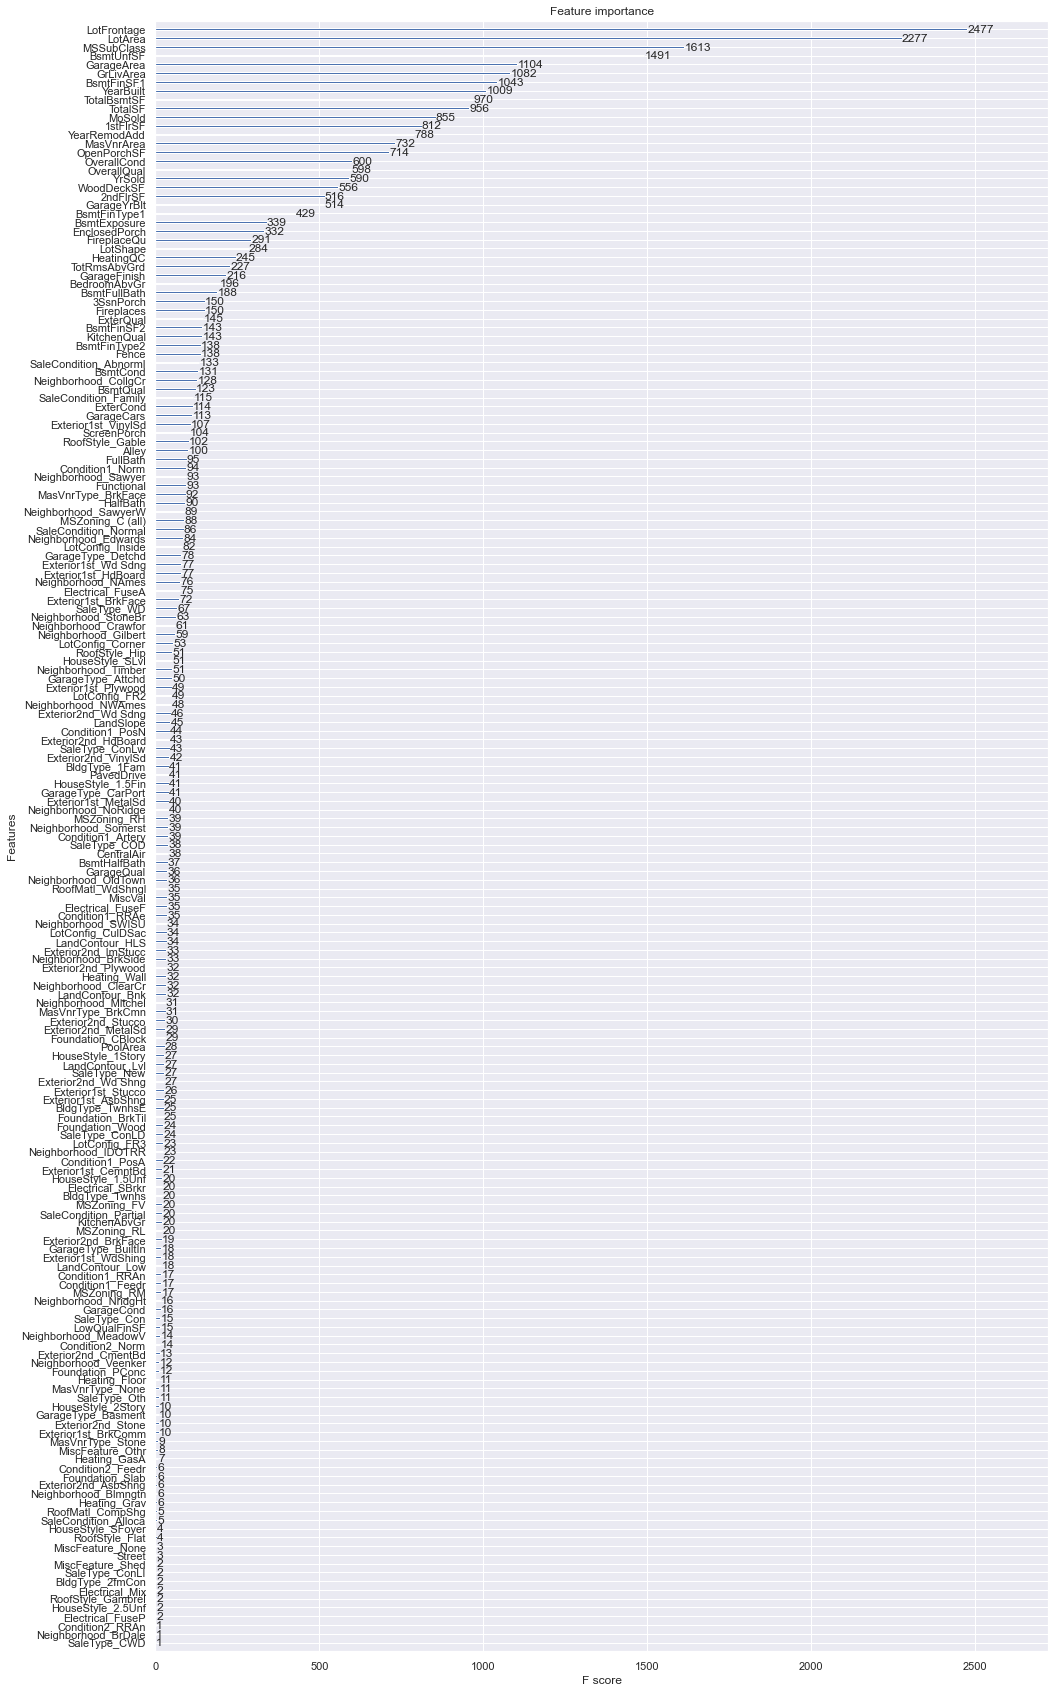

In [83]:
# plot feature importance using a built-in function in XGBoost
from xgboost import plot_importance
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=30.0 # from King County House Prices
plot_importance(xgb_clf)
pyplot.show()